In [5]:
!c:\users\llrow\anaconda3\python.exe -m pip install --upgrade pip

  Using cached pip-22.0.3-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


In [2]:
!pip install timedelta

  Created wheel for timedelta: filename=timedelta-2020.12.3-py3-none-any.whl size=1623 sha256=393fdb7365e5e42498eef29352fcf6a4107e559d43b6341d9af7865f98049cac
  Stored in directory: c:\users\llrow\appdata\local\pip\cache\wheels\37\e0\1b\4080834981be3775e6452515f78a6d8f26d071023ad2d6dacf
Successfully built timedelta


You should consider upgrading via the 'c:\users\llrow\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import datetime as datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

%matplotlib inline

In [8]:
df = pd.read_csv(r"C:\Users\llrow\Desktop\GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [17]:
print(df.isnull().sum())
print('-------------')
print(df.shape)
print('-------------')
print(df.dtypes)

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64
-------------
(8599212, 7)
-------------
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object


In [18]:
df = df.dropna(how='any', axis=0)
print(df.shape)

(8235082, 7)


In [21]:
df.rename(columns={'dt':'Date'}, inplace=True)
df.head()

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['1743-11-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-09-01', '1744-10-01', '1744-11-01',
               '1744-12-01', '1745-01-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=8235082, freq=None)

In [23]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [26]:
df['Year'] = df.index.year
df.describe()

,AverageTemperature,AverageTemperatureUncertainty,Year
count,8.235082e+06,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00,1.910834e+03
std,1.035344e+01,1.129733e+00,6.419609e+01
min,-4.270400e+01,3.400000e-02,1.743000e+03
25%,1.029900e+01,3.370000e-01,1.865000e+03
50%,1.883100e+01,5.910000e-01,1.915000e+03
75%,2.521000e+01,1.349000e+00,1.964000e+03
max,3.965100e+01,1.539600e+01,2.013000e+03


In [29]:
year_df = df.loc['1743':'2013']
year_df.head()

<ipython-input-29-0335d7db5c90>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  year_df = df.loc['1743':'2013']


,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
Date,,,,,,,
1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744


In [32]:
year_df[['Country', 'AverageTemperature']].groupby(['Country']).mean().sort_values('AverageTemperature')

,AverageTemperature
Country,
Mongolia,-3.365485
Iceland,1.500089
Russia,3.347268
Norway,3.612553
Finland,3.711645
...,...
Mali,27.590491
Burkina Faso,27.815295
Sudan,28.072831


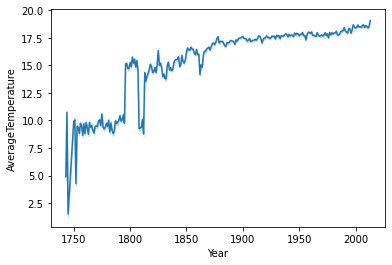

In [34]:
plt.figure()
sns.lineplot(x='Year', y='AverageTemperature', data=year_df)
plt.show()

In [36]:
resample_df = year_df[['AverageTemperature']].resample('A').mean()

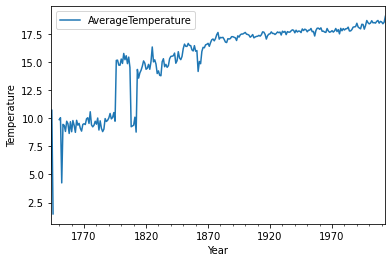

In [37]:
resample_df.plot()
plt.ylabel('Temperature')
plt.xlabel('Year')
plt.legend()

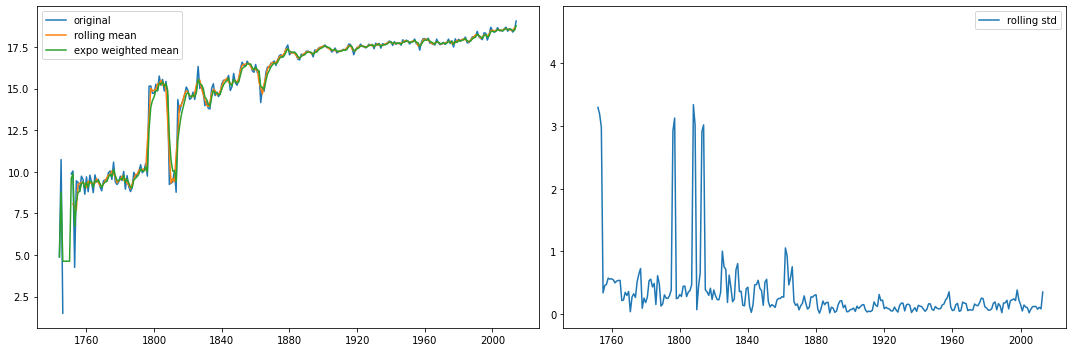

In [46]:
rol_mean = resample_df.rolling(window=3, center=True).mean()

ewm = resample_df.ewm(span=3).mean()

rol_std = resample_df.rolling(window=3, center=True).std()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.plot(resample_df,label='original')
ax1.plot(rol_mean,label='rolling mean')
ax1.plot(ewm,label='expo weighted mean')
ax1.legend()

ax2.plot(rol_std,label='rolling std')
ax2.legend()

plt.tight_layout()
plt.show()